<a href="https://colab.research.google.com/github/AtifQureshi110/Projects/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library

In [1]:
import zipfile

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

# Data

In [3]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/image classification /archive.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

# VGG16 model

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

# 80, 40, 20, 10, 1
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# generators Normalize

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Compile and Training

In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
from keras.callbacks import  EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacks = [early_stopping]

In [13]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds, callbacks=callbacks)

Epoch 1/5
625/625 [==============================] - 75s 102ms/step - loss: 0.3988 - accuracy: 0.8091 - val_loss: 0.2023 - val_accuracy: 0.9136
Epoch 2/5
625/625 [==============================] - 65s 104ms/step - loss: 0.2296 - accuracy: 0.9111 - val_loss: 0.1631 - val_accuracy: 0.9354
Epoch 3/5
625/625 [==============================] - 75s 120ms/step - loss: 0.1792 - accuracy: 0.9326 - val_loss: 0.1407 - val_accuracy: 0.9442
Epoch 4/5
625/625 [==============================] - 75s 120ms/step - loss: 0.1516 - accuracy: 0.9455 - val_loss: 0.1410 - val_accuracy: 0.9502
Epoch 5/5
625/625 [==============================] - 66s 105ms/step - loss: 0.1230 - accuracy: 0.9568 - val_loss: 0.1409 - val_accuracy: 0.9460


# viz of training

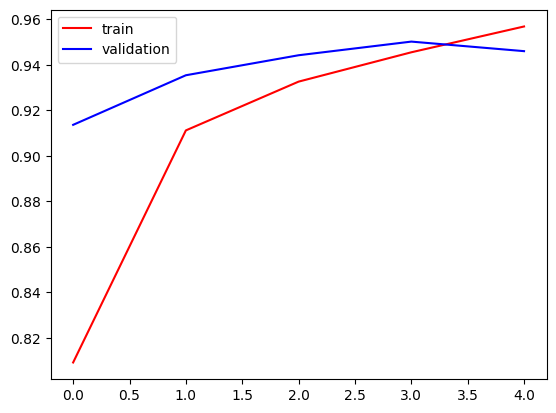

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

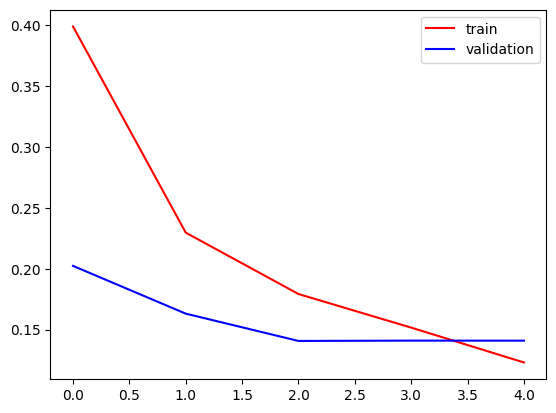

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# save and load the model

In [18]:

import pickle

with open('/content/drive/MyDrive/image classification /modelvgg16.pkl', 'wb') as file:
    pickle.dump(model, file)


In [20]:
import pickle

with open('/content/drive/MyDrive/image classification /modelvgg16.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [25]:
import numpy as np

from PIL import Image

In [34]:
# Load and preprocess the new image(s)
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    # Resize the image to match the input shape of the model (e.g., 256x256)
    img = img.resize((150,150))
    # Convert the image to a numpy array and normalize the pixel values
    img_array = np.array(img) / 255.0
    # Add a batch dimension to the image array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [35]:
# Predict on the preprocessed image(s)
def predict_image(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(img_array)
    return predictions

# prediction on test data

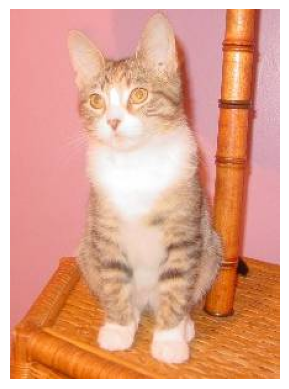

1/1 [==============================] - 0s 34ms/step
cat


In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_img(path):
    # Load and display the image
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.axis('off')  # Hide the axis
    return plt.show()

def pred(path):
    # Example usage
    predictions = predict_image(path)  # You need to define predict_image function
    if predictions > 0.5:
        print("dog")
    else:
        print("cat")

img = "/content/test/cats/cat.10007.jpg"
show_img(img)
pred(img)

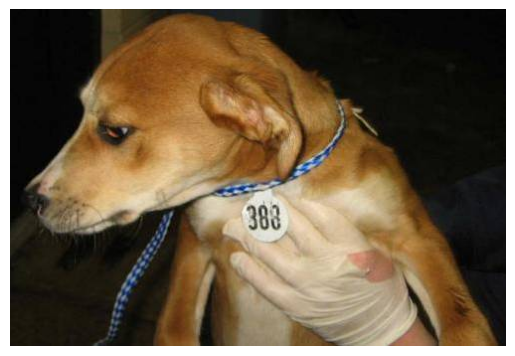

1/1 [==============================] - 0s 38ms/step
dog


In [37]:
img = "/content/test/dogs/dog.10006.jpg"
show_img(img)
pred(img)

# prediction on new data

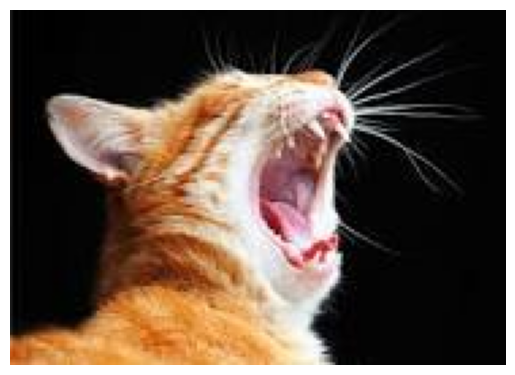

1/1 [==============================] - 0s 29ms/step
cat


In [39]:
img = "/content/cat01.jpg"
show_img(img)
pred(img)

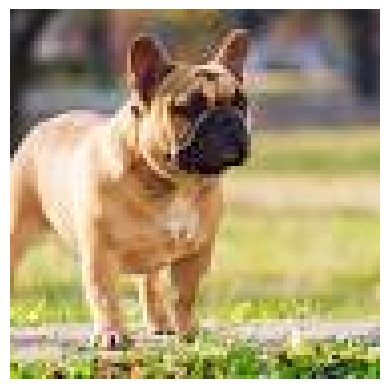

1/1 [==============================] - 0s 32ms/step
dog


In [40]:
img = "/content/dog01.jpg"
show_img(img)
pred(img)